# **Importing Libraries**

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random
from scipy.stats import bernoulli, multivariate_normal

# **Y|X ~ Ber($\eta(X)$)**

## **Dataset**

I am taking my $f(x)=W^T x+b$ where x $\in \mathcal{R}^2$ 
$$ f(x_1.x_2)=-3 * x_1 + 2 * x_2 - 1$$
$$ \eta(x)=\frac{1}{1+exp(f(x))}$$

In [11]:
def f(x):
    return -3 * x[:,0] + 2 * x[:,1] - 1



def eta(x):
    return 1 / (1 + np.exp(f(x)))



Decision Boundary will correspond to the line where $\eta(x) = \frac{1}{2}$ i.e. $f(x)=0$

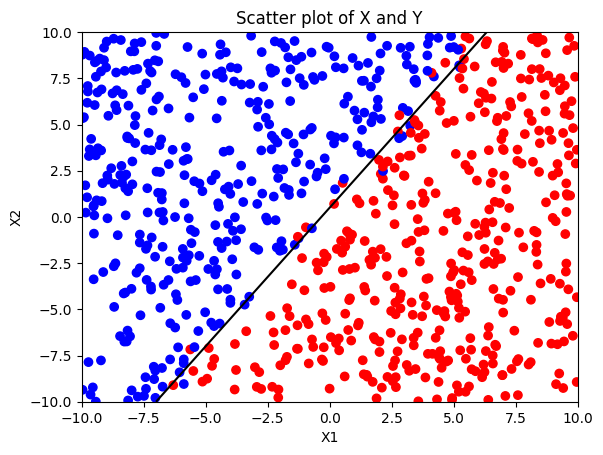

In [14]:
n_samples = 1000
train_size = 0.8

X = np.random.uniform(-10, 10, (n_samples, 2))
probabilities = eta(X)
Y = np.random.binomial(1, probabilities)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

f_values = f(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of X and Y')

xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

f_values = f(grid)
f_values = f_values.reshape(xx.shape)
plt.contour(xx, yy, f_values, levels=[0], colors='black')

plt.show()

## **Baye's Classifier**

In [15]:
def calculate_misclassification_error_bayes(n_samples=1000, i=100,train_size=0.8):
    misclassification_error = []
    
    for _ in range(i):
        X = np.random.uniform(-10, 10, (n_samples, 2))
        probabilities = eta(X)
        Y = np.random.binomial(1, probabilities)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)
        Y_pred1 = (eta(X_test) >= 0.5)
        me = np.mean(Y_pred1 != Y_test)
        misclassification_error.append(me)
    
    return np.mean(misclassification_error)


In [16]:
me0=calculate_misclassification_error_bayes(n_samples=1000, i=100,train_size=0.8)
print("Mean missclassification error: ", me0)

Mean missclassification error:  0.023700000000000002


### Impact of size of Training set 

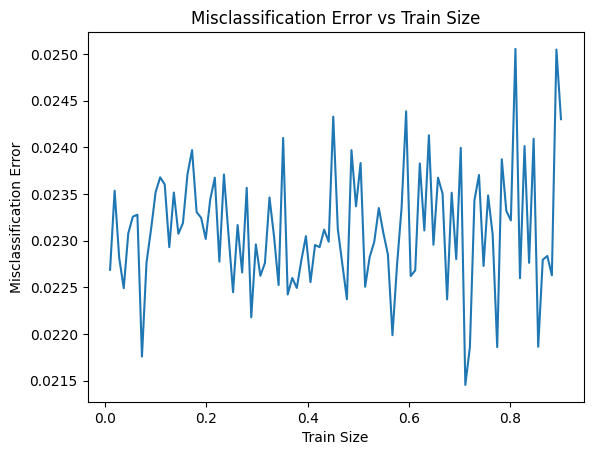

In [17]:
train_sizes = np.linspace(0.01, 0.9, 100)
misclassification_errors = [calculate_misclassification_error_bayes(n_samples=1000, i=100,train_size=train_size) for train_size in train_sizes]

plt.plot(train_sizes, misclassification_errors)
plt.xlabel('Train Size')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Train Size')
plt.show()

### Impact of size of n_samples

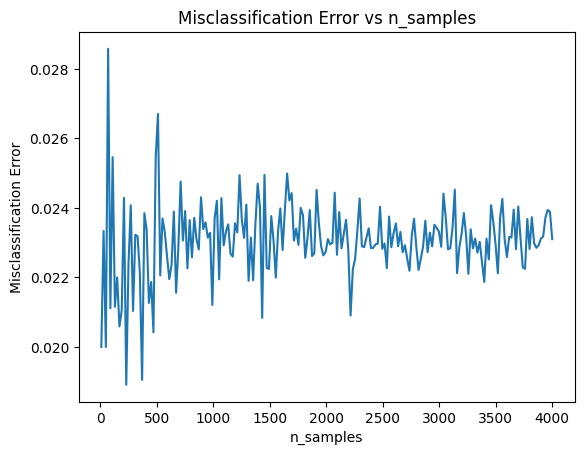

In [19]:
n_samples = np.linspace(10,4000, 200)
misclassification_errors = [calculate_misclassification_error_bayes(n_samples=int(n), i=100,train_size=0.8) for n in n_samples]

plt.plot(n_samples, misclassification_errors)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **Logistic Regression**

In [22]:
def calculate_misclassification_error_lr(n_samples=1000, i=100,train_size=0.8):
    misclassification_error = []
    
    for _ in range(i):
        X = np.random.uniform(-10, 10, (n_samples, 2))
        probabilities = eta(X)
        Y = np.random.binomial(1, probabilities)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        model = LogisticRegression()
        model.fit(X_train, Y_train)

        Y_pred = model.predict(X_test)
        me = np.mean(Y_pred != Y_test)
        misclassification_error.append(me)
    
    return np.mean(misclassification_error)


In [24]:
me1=calculate_misclassification_error_lr(n_samples=1000, i=100,train_size=0.8)
print("Mean missclassification error: ", me1)

Mean missclassification error:  0.024550000000000006


### Impact of size of Training set 

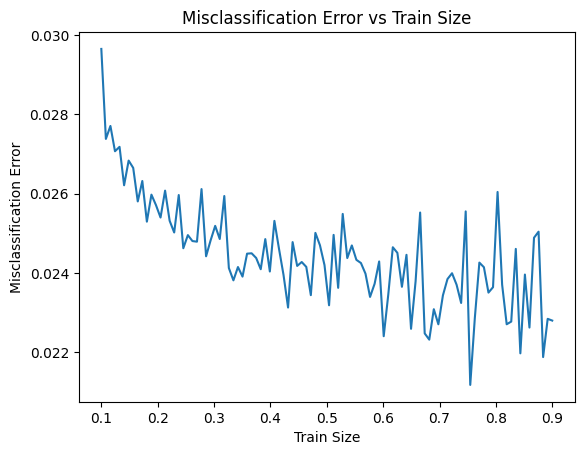

In [25]:
train_sizes = np.linspace(0.1, 0.9, 100)
misclassification_errors = [calculate_misclassification_error_lr(n_samples=1000, i=100,train_size=train_size) for train_size in train_sizes]

plt.plot(train_sizes, misclassification_errors)
plt.xlabel('Train Size')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Train Size')
plt.show()

### Impact of size of n_samples

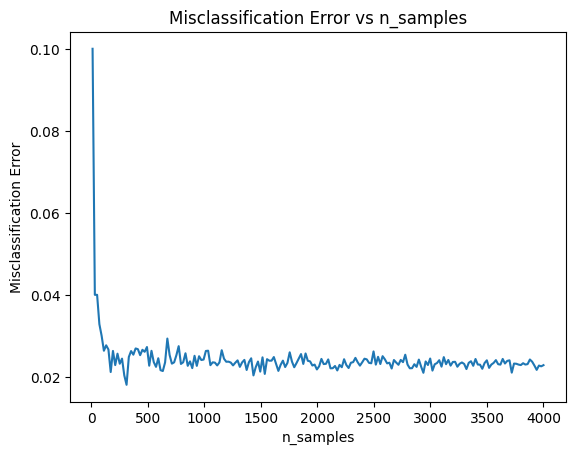

In [26]:
n_samples = np.linspace(10,4000, 200)
misclassification_errors = [calculate_misclassification_error_lr(n_samples=int(n), i=50,train_size=0.8) for n in n_samples]

plt.plot(n_samples, misclassification_errors)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **Random Forest**

In [27]:
def calculate_misclassification_error_rf(n_samples=1000, i=100,train_size=0.8):
    misclassification_error = []
    
    for _ in range(i):
        X = np.random.uniform(-10, 10, (n_samples, 2))
        probabilities = eta(X)
        Y = np.random.binomial(1, probabilities)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X_train, Y_train)

        Y_pred = model.predict(X_test)
        me = np.mean(Y_pred != Y_test)
        misclassification_error.append(me)
    
    return np.mean(misclassification_error)


In [28]:
me2=calculate_misclassification_error_rf(n_samples=1000, i=100,train_size=0.8)
print("Mean missclassification error: ", me2)

Mean missclassification error:  0.03435


### Impact of size of Training set 

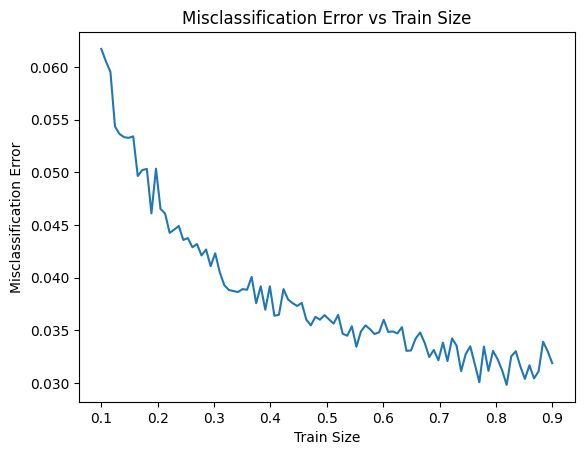

In [29]:
train_sizes = np.linspace(0.1, 0.9, 100)
misclassification_errors = [calculate_misclassification_error_rf(n_samples=1000, i=100,train_size=train_size) for train_size in train_sizes]

plt.plot(train_sizes, misclassification_errors)
plt.xlabel('Train Size')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Train Size')
plt.show()

### Impact of size of n_samples 

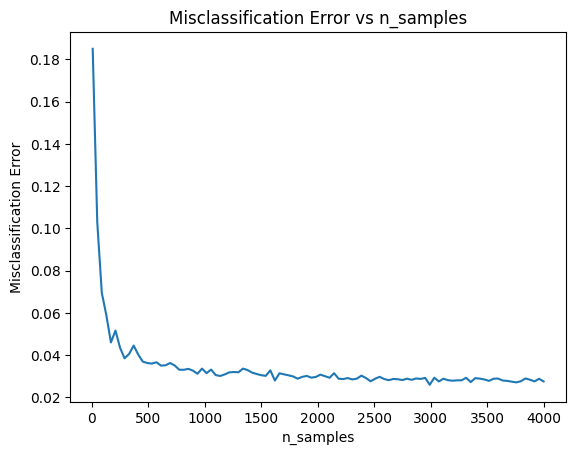

In [30]:
n_samples = np.linspace(10,4000, 100)
misclassification_errors = [calculate_misclassification_error_rf(n_samples=int(n), i=100,train_size=0.8) for n in n_samples]

plt.plot(n_samples, misclassification_errors)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **KNN**

In [31]:
def calculate_misclassification_error_knn(n_samples=1000, i=100,train_size=0.8,k=5):
    misclassification_error = []
    
    for _ in range(i):
        X = np.random.uniform(-10, 10, (n_samples, 2))
        probabilities = eta(X)
        Y = np.random.binomial(1, probabilities)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, Y_train)

        Y_pred = model.predict(X_test)
        me = np.mean(Y_pred != Y_test)
        misclassification_error.append(me)
    
    return np.mean(misclassification_error)


In [32]:
me3=calculate_misclassification_error_knn(n_samples=1000, i=100,train_size=0.8,k=6)
print("Mean missclassification error: ", me3)

Mean missclassification error:  0.030350000000000005


### Impact of size of Training set 

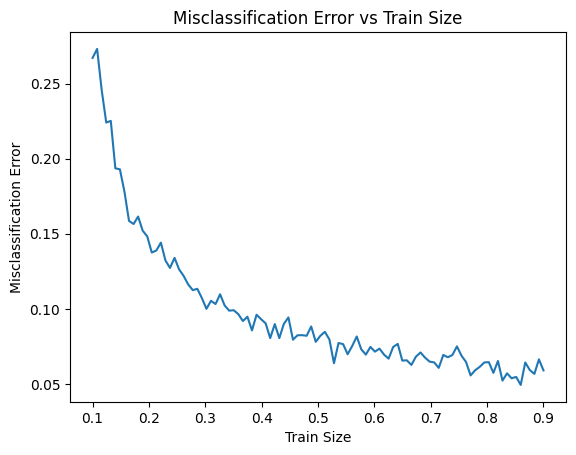

In [33]:
train_sizes = np.linspace(0.1, 0.9, 100)
misclassification_errors = [calculate_misclassification_error_knn(n_samples=100, i=100,train_size=train_size,k=6) for train_size in train_sizes]

plt.plot(train_sizes, misclassification_errors)
plt.xlabel('Train Size')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Train Size')
plt.show()

### Impact of k values

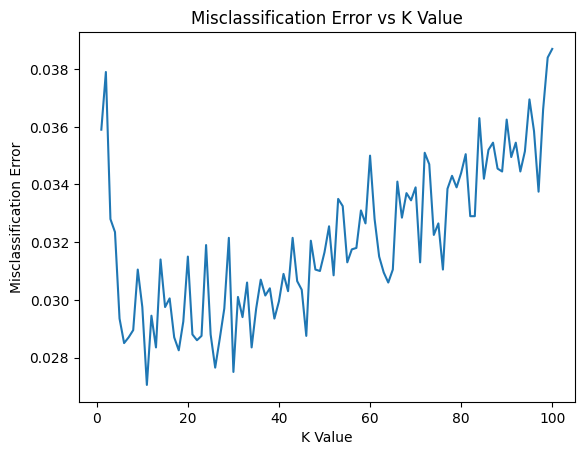

In [34]:
k_list = np.linspace(1,100, 100)
misclassification_errors = [calculate_misclassification_error_knn(n_samples=1000, i=100,train_size=0.8,k=int(k)) for k in k_list]

plt.plot(k_list, misclassification_errors)
plt.xlabel('K Value')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs K Value')
plt.show()

### Impact of size of n_samples

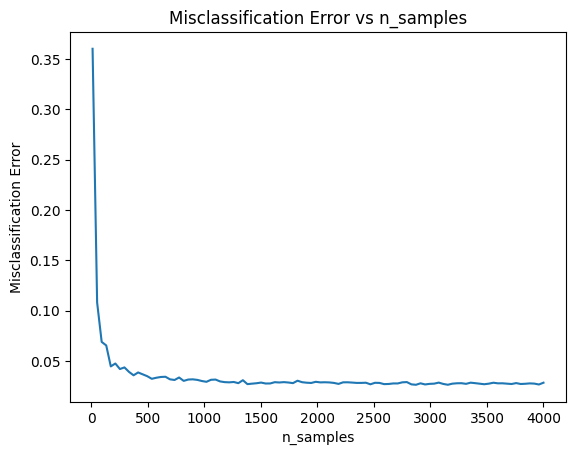

In [35]:
n_samples = np.linspace(10,4000, 100)
misclassification_errors = [calculate_misclassification_error_knn(n_samples=int(n), i=100,train_size=0.8,k=6) for n in n_samples]

plt.plot(n_samples, misclassification_errors)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **Combined Misclassification errors** 

In [38]:

def f(x1, x2):
    return -3 * x1 + 2 * x2 - 1


def eta(x):
    return 1 / (1 + np.exp(f(*x)))



In [39]:
def calculate_misclassification_error_combined(n_samples=1000, i=100,train_size=0.8,k=5):
    
    mean_lr=[]
    mean_rf=[]
    mean_knn=[]
    mean_bayes=[]
    for _ in range(i):
        X = np.random.uniform(-10, 10, (n_samples, 2))
        
        probabilities = eta(X.T)

        
        Y = np.random.binomial(1, probabilities)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        model_lr = LogisticRegression()
        model_lr.fit(X_train, Y_train)
        Y_pred_lr = model_lr.predict(X_test)
        me_lr = np.mean(Y_pred_lr != Y_test)
        mean_lr.append(me_lr)
        
        model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
        model_rf.fit(X_train, Y_train)
        Y_pred_rf = model_rf.predict(X_test)
        me_rf = np.mean(Y_pred_rf != Y_test)
        mean_rf.append(me_rf)


        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train, Y_train)
        Y_pred_knn = model_knn.predict(X_test)
        me_knn = np.mean(Y_pred_knn != Y_test)
        mean_knn.append(me_knn)
        
        probabilities_test = eta(X_test.T)
        Y_pred_bayes = (probabilities_test >= 0.5).astype(int)
        me_bayes = np.mean(Y_pred_bayes != Y_test)
        mean_bayes.append(me_bayes)

        
    
    mean_misclassification_error = [np.mean(mean_lr),np.mean(mean_rf),np.mean(mean_knn),np.mean(mean_bayes)]
    std_me=[np.std(mean_lr),np.std(mean_rf),np.std(mean_knn),np.std(mean_bayes)]
    return mean_misclassification_error,std_me
    

In [40]:
combined_me=calculate_misclassification_error_combined(n_samples=1000, i=100,train_size=0.8,k=6)
print("Mean missclassification error: ", combined_me[0])
print("Standard deviation of missclassification error: ", combined_me[1])

Mean missclassification error:  [0.0239, 0.031, 0.028950000000000004, 0.023399999999999997]
Standard deviation of missclassification error:  [0.011865496196956956, 0.012549900398011134, 0.01245582193193207, 0.011955751753863075]


# **Y~ Ber(p) and X|Y ~ $\mathcal{N}_{\mathcal{R}^d}(\mu_Y, Id)$**

## **Dataset**

In [55]:
def eta1(x,p=1/2,mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]])):
    eta= p * multivariate_normal.pdf(x, mean=mean1, cov=cov1) / ((p * multivariate_normal.pdf(x, mean=mean1, cov=cov1) + (1 - p) * multivariate_normal.pdf(x, mean=mean0, cov=cov0)))
    return eta

In [56]:
def generate_data(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]])):
    Y = bernoulli.rvs(0.5, size=n_samples)
    X = np.zeros((n_samples, n_features))
    
    
    for i in range(n_samples):
        if Y[i] == 0:
            X[i, :] = multivariate_normal.rvs(mean=mean0, cov=cov0)
        else:
            X[i, :] = multivariate_normal.rvs(mean=mean1, cov=cov1)
    
    return X, Y

decision boundary is where $\eta(x)=0.5$

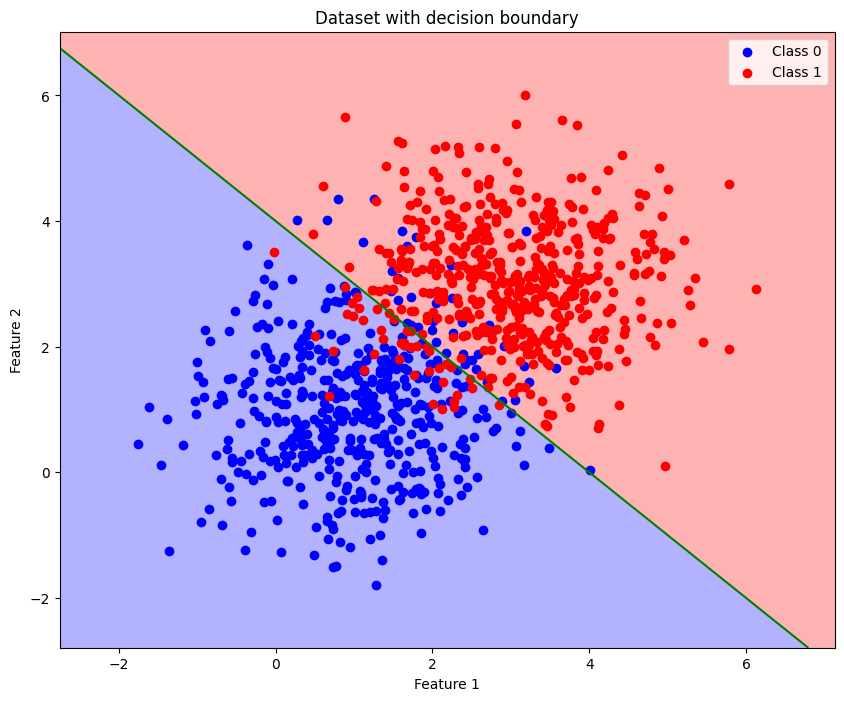

In [57]:

X, Y = generate_data()


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]


Z = np.array([eta1(point) for point in grid])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Class 1')
plt.contour(xx, yy, Z, levels=[0.5], colors='green')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with decision boundary')
plt.show()

## **Baye's Risk**

In [44]:
def calculate_misclassification_error__bayes1(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]), i=100,train_size=0.8):
    
    mean_bayes=[]
    for _ in range(i):
        data=generate_data(n_samples=1000)
        X=data[0]
        Y = data[1]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        probabilities_test = eta1(X_test)
        Y_pred_bayes = (probabilities_test >= 0.5).astype(int)
        me_bayes = np.mean(Y_pred_bayes != Y_test)
        mean_bayes.append(me_bayes)

    return np.mean(mean_bayes),np.std(mean_bayes)
    

In [45]:
me01=calculate_misclassification_error__bayes1(n_samples=1000)
print("Mean missclassification error: ", me01[0])

Mean missclassification error:  0.07794999999999998


### Impact Of Size of Training Set

In [51]:
train_sizes = np.linspace(0.1, 0.9, 30)
misclassification_errors = [calculate_misclassification_error__bayes1(train_size=train_size,i=50) for train_size in train_sizes]

In [52]:
me_list=[]
for h in range(len(misclassification_errors)):
    me_list.append(misclassification_errors[h][0])


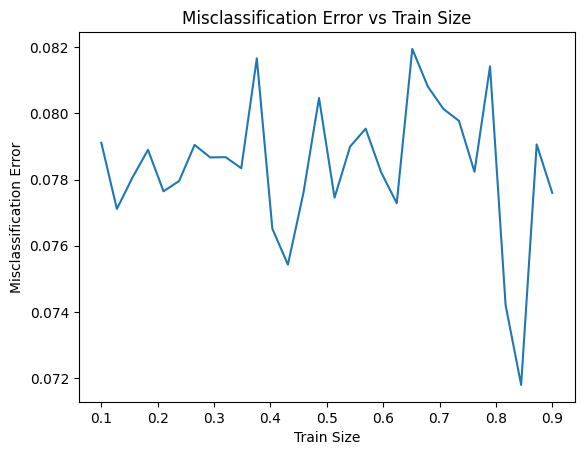

In [53]:

plt.plot(train_sizes, me_list)
plt.xlabel('Train Size')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Train Size')
plt.show()

### Impact Of Size of n_samples

In [321]:
n_samples = np.linspace(10,1000, 50)
misclassification_errors1 = [calculate_misclassification_error__bayes1(n_samples=int(n),i=50) for n in n_samples]

In [323]:
me__list=[]
for h2 in range(len(misclassification_errors1)):
    me__list.append(misclassification_errors1[h2][0])

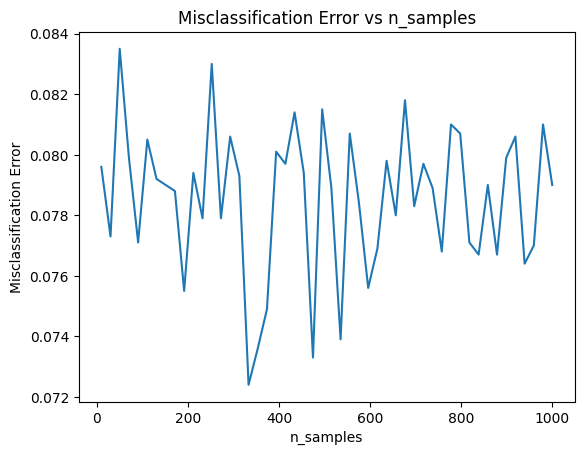

In [324]:

plt.plot(n_samples, me__list)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **Logistic Regression**

warm_start and define logistic outside loop

In [345]:
def calculate_misclassification_error_lr1(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]), i=100,train_size=0.8):
    
    mean_lr=[]
    for _ in range(i):
        data=generate_data(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]))
        X=data[0]
        Y = data[1]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        model_lr = LogisticRegression()
        model_lr.fit(X_train, Y_train)
        Y_pred_lr = model_lr.predict(X_test)
        me_lr = np.mean(Y_pred_lr != Y_test)
        mean_lr.append(me_lr)
        
    
    mean_misclassification_error = np.mean(mean_lr)
    std_me=np.std(mean_lr)
    return mean_misclassification_error,std_me
    

In [311]:
me11=calculate_misclassification_error_lr1(n_samples=1000, i=100,train_size=0.8)
print("Mean missclassification error: ", me11[0])
print("Standard Deviation :", me11[1])

Mean missclassification error:  0.07834999999999999
Standard Deviation : 0.01877571569874235


### Impact of size of train_size

In [346]:
train_sizes = np.linspace(0.1, 0.9, 50)
misclassification_errors = [calculate_misclassification_error_lr1(train_size=train_size,i=30) for train_size in train_sizes]

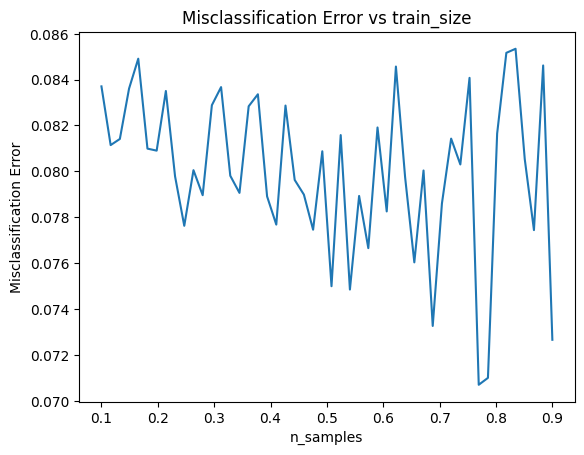

In [347]:
me_list1=[]
for h3 in range(len(misclassification_errors)):
    me_list1.append(misclassification_errors[h3][0])

plt.plot(train_sizes, me_list1)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs train_size')
plt.show()

### Impact of size of n_samples 

In [348]:
n_samples = np.linspace(10,1000, 50)
misclassification_errors = [calculate_misclassification_error_lr1(n_samples=int(n),i=30) for n in n_samples]

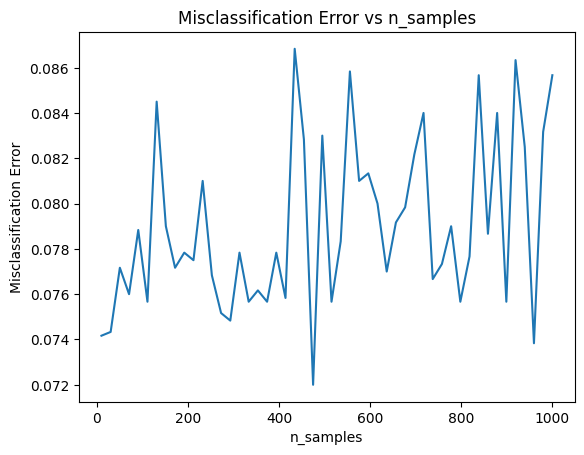

In [349]:
me_list2=[]
for h4 in range(len(misclassification_errors)):
    me_list2.append(misclassification_errors[h4][0])
plt.plot(n_samples, me_list2)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **Random Forest**

In [312]:
def calculate_misclassification_error_rf1(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]), i=100,train_size=0.8):
    
    
    mean_rf=[]

    for _ in range(i):
        data=generate_data(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]))
        X=data[0]
        Y = data[1]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        
        model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
        model_rf.fit(X_train, Y_train)
        Y_pred_rf = model_rf.predict(X_test)
        me_rf = np.mean(Y_pred_rf != Y_test)
        mean_rf.append(me_rf)

        
    
    mean_misclassification_error = np.mean(mean_rf)
    std_me=np.std(mean_rf)
    return mean_misclassification_error,std_me
    

In [313]:
me11=calculate_misclassification_error_rf1(n_samples=1000, i=50,train_size=0.8)
print("Mean missclassification error: ", me11[0])
print("Standard Deviation :", me11[1])

Mean missclassification error:  0.08910000000000001
Standard Deviation : 0.022331368072735714


### Impact of size of train_size

In [260]:
train_sizes = np.linspace(0.1, 0.9, 50)
misclassification_errors = [calculate_misclassification_error_rf1(train_size=train_size,i=30) for train_size in train_sizes]

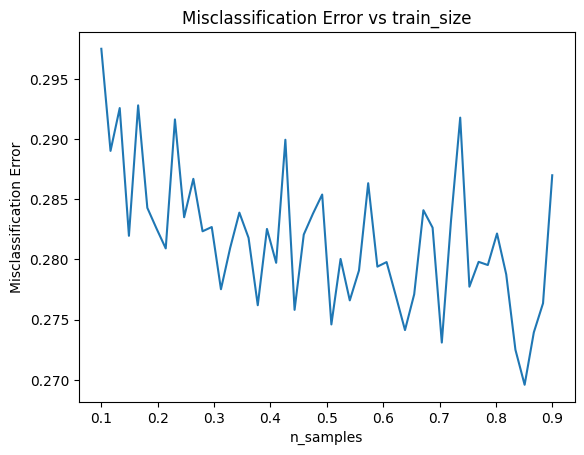

In [261]:
me_list1=[]
for h3 in range(len(misclassification_errors)):
    me_list1.append(misclassification_errors[h3][0])

plt.plot(train_sizes, me_list1)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs train_size')
plt.show()

### Impact Of size of n_samples

In [262]:
n_samples = np.linspace(10,1000, 50)
misclassification_errors = [calculate_misclassification_error_rf1(n_samples=int(n),i=30) for n in n_samples]

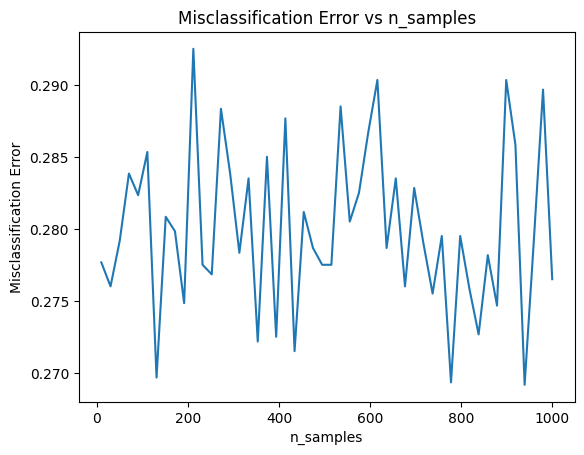

In [263]:
me_list2=[]
for h4 in range(len(misclassification_errors)):
    me_list2.append(misclassification_errors[h4][0])
plt.plot(n_samples, me_list2)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **KNN**

In [58]:
def calculate_misclassification_error_knn1(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]), i=100,train_size=0.8,k=5):
    
    mean_knn=[]
   
    for _ in range(i):
        data=generate_data(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]))
        X=data[0]
        Y = data[1]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)



        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train, Y_train)
        Y_pred_knn = model_knn.predict(X_test)
        me_knn = np.mean(Y_pred_knn != Y_test)
        mean_knn.append(me_knn)
        
        
    
    mean_misclassification_error = np.mean(mean_knn)
    std_me=np.std(mean_knn)
    return mean_misclassification_error,std_me
    

In [59]:
me21=calculate_misclassification_error_knn1(n_samples=1000, i=50,train_size=0.8)
print("Mean missclassification error: ", me21[0])
print("Standard Deviation :", me21[1])

Mean missclassification error:  0.088
Standard Deviation : 0.019052558883257648


### Impact of K

In [64]:
k_list = np.linspace(1,100, 30)
misclassification_errors = [calculate_misclassification_error_knn1(n_samples=500, i=50,train_size=0.8,k=int(k)) for k in k_list]


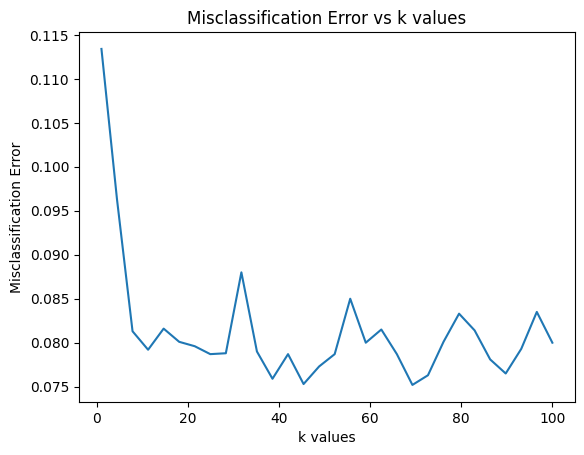

In [65]:
me_list1=[]
for h3 in range(len(misclassification_errors)):
    me_list1.append(misclassification_errors[h3][0])

plt.plot(k_list, me_list1)
plt.xlabel('k values')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs k values')
plt.show()

### Impact of size of train_size

In [353]:
train_sizes = np.linspace(0.1, 0.9, 50)
misclassification_errors = [calculate_misclassification_error_knn1(train_size=train_size,i=30) for train_size in train_sizes]

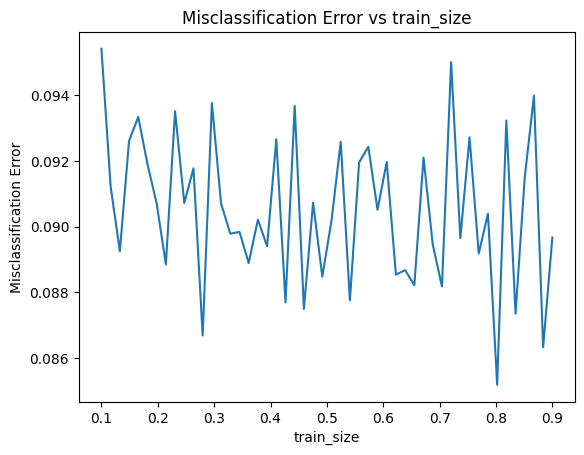

In [355]:
me_list1=[]
for h3 in range(len(misclassification_errors)):
    me_list1.append(misclassification_errors[h3][0])

plt.plot(train_sizes, me_list1)
plt.xlabel('train_size')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs train_size')
plt.show()

### Impact of size of n_samples

In [244]:
n_samples = np.linspace(10,1000, 50)
misclassification_errors = [calculate_misclassification_error_knn1(n_samples=int(n),i=30) for n in n_samples]

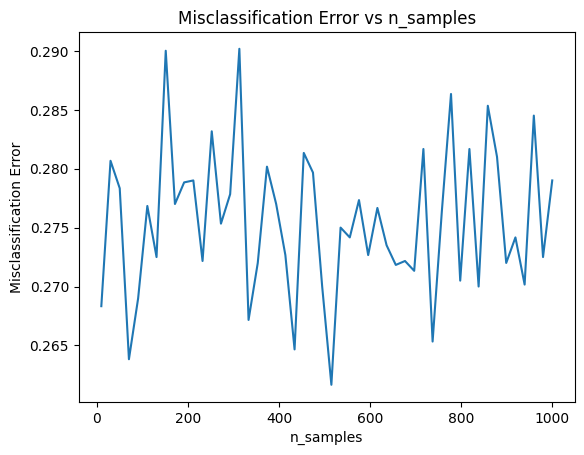

In [245]:
me_list2=[]
for h4 in range(len(misclassification_errors)):
    me_list2.append(misclassification_errors[h4][0])
plt.plot(n_samples, me_list2)
plt.xlabel('n_samples')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs n_samples')
plt.show()

## **Combined Misclassification Error**

In [316]:
def calculate_misclassification_error_combined1(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]), i=100,train_size=0.8,k=5):
    
    mean_lr=[]
    mean_rf=[]
    mean_knn=[]
    mean_bayes=[]
    for _ in range(i):
        data=generate_data(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]))
        X=data[0]
        Y = data[1]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_size)

        model_lr = LogisticRegression()
        model_lr.fit(X_train, Y_train)
        Y_pred_lr = model_lr.predict(X_test)
        me_lr = np.mean(Y_pred_lr != Y_test)
        mean_lr.append(me_lr)
        
        model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
        model_rf.fit(X_train, Y_train)
        Y_pred_rf = model_rf.predict(X_test)
        me_rf = np.mean(Y_pred_rf != Y_test)
        mean_rf.append(me_rf)


        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train, Y_train)
        Y_pred_knn = model_knn.predict(X_test)
        me_knn = np.mean(Y_pred_knn != Y_test)
        mean_knn.append(me_knn)
        
        probabilities_test = eta1(X_test)
        Y_pred_bayes = (probabilities_test >= 0.5).astype(int)
        me_bayes = np.mean(Y_pred_bayes != Y_test)
        mean_bayes.append(me_bayes)

        
    
    mean_misclassification_error = [np.mean(mean_lr),np.mean(mean_rf),np.mean(mean_knn),np.mean(mean_bayes)]
    std_me=[np.std(mean_lr),np.std(mean_rf),np.std(mean_knn),np.std(mean_bayes)]
    return mean_misclassification_error,std_me
    

In [317]:
combined_me1=calculate_misclassification_error_combined1(n_samples=1000, n_features=2, mean0=np.array([1,1]), mean1=np.array([3,3]), cov0=np.array([[1, 0], [0, 1]]), cov1=np.array([[1, 0], [0, 1]]), i=100,train_size=0.8,k=5)
print("Model              : Logistic Regression      Random Forest      KNN      Bayes")
print("Mean               : ", combined_me1[0])
print("Standard deviation : ", combined_me1[1])

Model              : Logistic Regression      Random Forest      KNN      Bayes
Mean               :  [0.08085, 0.09294999999999998, 0.09005, 0.08024999999999999]
Standard deviation :  [0.018987561718135374, 0.02166904474128936, 0.022355032990358126, 0.018362665928453856]


# **Active Learning Algorithm**

## **Dataset**

In [2]:
def f(x1, x2):
    return -10 * x1 + 10 * x2 - 5

def eta(x):
    return 1 / (1 + np.exp(f(*x)))


def create_data(n_samples=10000, d=2):
    X = np.random.uniform(0, 1, (n_samples, d))
    probabilities = eta(X.T)
    Y = np.random.binomial(1, probabilities)
    return X, Y
    

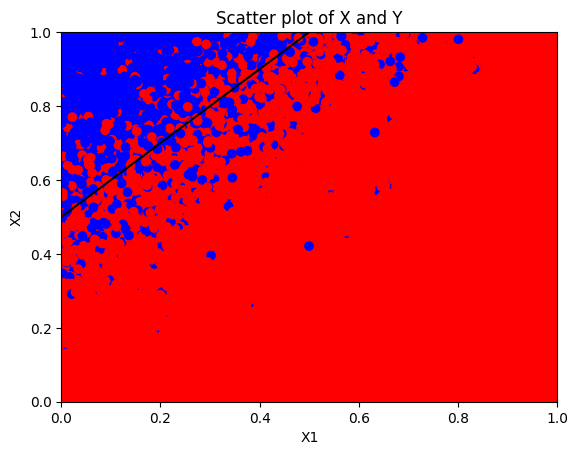

In [3]:
data = create_data(n_samples=100000,d=2)
X = data[0]
Y = data[1]

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of X and Y')


xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]


f_values = f(grid[:, 0], grid[:, 1])
f_values = f_values.reshape(xx.shape)
plt.contour(xx, yy, f_values, levels=[0], colors='black')

plt.show()


## **Algorithm**

In [17]:
def score_function(x, eta):
    prob = (eta.predict_proba([x]))[0][1]
    score=max(prob,1-prob)
    return score

def find_threshold(Ak, eta, p):
    f_values = [score_function(x, eta) for x in Ak]
    sorted_f_values = np.sort(f_values)
    
    # Find the index corresponding to the desired quantile
    index = int(np.ceil(p * len(sorted_f_values))) - 1
    
    # Get the threshold value
    s = sorted_f_values[index]
    return s



def active_learning_with_rejection(data,a,beta=1, N1=500, d=2, c=1.5, M=100):
    N = [] 
    A = [] 
    epsilon = []
    eta = []
    lambda_ = []
    D = []


    N.append(int(np.sqrt(N1)))
    A.append(data[0])
    epsilon.append(1)
    D.append([])

    B = N[0]
    L = [data[1]]
    k = 1

    X = A[0]
    Y = L[0]
    data_points = [(x, y) for x, y in zip(X, Y)]
    indices = np.random.choice(len(data_points), size=N[0], replace=False)
    DN0 = [data_points[i] for i in indices]
    D[0] = DN0
    X0 = [pair[0] for pair in DN0]
    Y0 = [pair[1] for pair in DN0]
    eta_0 = LogisticRegression()
    eta_0.fit(X0, Y0)
    eta.append(eta_0)
    delta = 0.46
    i = 1
    N.append(int(c * N[i-1]))
    epsilon.append(min(0.85, (np.log(N1 / delta)) * (np.log(N1)) * ((N[i-1]) ** (-beta / (2 * beta + d)))))
    N_k = N[1]
    e_k = epsilon[1]
    lambda_.append(1)
    while B + np.floor(N_k * e_k) <= N1:
    
        indices1 = np.random.choice(len(A[i-1]), size=M, replace=False)
        D_U = [A[i-1][j] for j in indices1]
        lambda_.append(find_threshold(D_U, eta[i-1], e_k))
        A.append([x for x in A[i-1] if score_function(x, eta[i-1]) <= lambda_[i]])
        L.append([y for x, y in zip(A[i-1], L[i-1]) if score_function(x, eta[i-1]) <= lambda_[i]])
        indices2 = np.random.choice(len(L[i]), size=int(np.floor(N_k * e_k)), replace=False)
        d_points = [(x, y) for x, y in zip(A[i], L[i])]
        D.append([d_points[h] for h in indices2])
        X_i = [pair[0] for pair in D[i]]
        Y_i = [pair[1] for pair in D[i]]
        eta_i = LogisticRegression()
        eta_i.fit(X_i, Y_i)
        eta.append(eta_i)
        B = B + np.floor(N_k * e_k)
        i += 1
        N.append(int(c * N[i-1]))
        epsilon.append(min(0.85, (np.log(N1 / delta)) * (np.log(N1)) * ((N[i-1]) ** (-1 / (2 * beta + d)))))
        N_k = N[i]
        e_k = epsilon[i]

    eta_value = 0
    target_array=np.array(a)
    for j in range(len(eta) - 1):
        if (np.any([np.all(np.isclose(arr, target_array)) for arr in A[j]])) and (not np.any([np.all(np.isclose(arr, target_array)) for arr in A[j+1]])):
            eta_value += eta[j].predict_proba([a])[0][1]
    if np.any([np.all(np.isclose(arr, target_array)) for arr in A[-1]]):
        eta_value += eta[-1].predict_proba([a])[0][1]

    
    if eta_value >= 0.5:
        label=1

    else:
        label=0
    return eta_value,label,epsilon,A,eta




In [18]:
indices = np.where(data[1] == 0)[0]
print("Indices: ", indices[50])
a=data[0][indices[408]]

Indices:  408


In [19]:
data[1][408]

0

In [20]:
eta_value,label,epsilon,A,eta=active_learning_with_rejection(data,a,beta=3, N1=5000, d=2, c=5, M=150)

In [12]:
print("Eta value: ", eta_value, "Label: ", label,"Epsilon", epsilon)

Eta value:  0.049800836328507056 Label:  0 Epsilon [1, 0.85, 0.85, 0.85]


In [13]:
[len(z) for z in A]

[100000, 83703, 70486]

## **Accuracy**

First, we will split the data into train and test set and then we will find the accuracy over test set.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data[0], data[1], test_size=0.004, random_state=42)

In [16]:
predicted_labels = []

for x in X_test:

    eta_value = 0
    target_array=np.array(x)
    for j in range(len(eta) - 1):
        if (np.any([np.all(np.isclose(arr, target_array)) for arr in A[j]])) and (not np.any([np.all(np.isclose(arr, target_array)) for arr in A[j+1]])):
            eta_value += eta[j].predict_proba([x])[0][1]
    if np.any([np.all(np.isclose(arr, target_array)) for arr in A[-1]]):
        eta_value += eta[-1].predict_proba([x])[0][1]

    
    if eta_value >= 0.5:
        label=1

    else:
        label=0
    predicted_labels.append(label)




accuracy = np.mean(predicted_labels == Y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

KeyboardInterrupt: 

## **Hyperparameter Tuning**

In [ ]:
def custom_accuracy(estimator, X, y):
    predicted_labels = []
    

    for x in X:
        eta_value = 0
        target_array = np.array(x)
        for j in range(len(estimator['eta']) - 1):
            if (np.any([np.all(np.isclose(arr, target_array)) for arr in estimator['A'][j]])) and (not np.any([np.all(np.isclose(arr, target_array)) for arr in estimator['A'][j+1]])):
                eta_value += estimator['eta'][j].predict_proba([x])[0][1]
        if np.any([np.all(np.isclose(arr, target_array)) for arr in estimator['A'][-1]]):
            eta_value += estimator['eta'][-1].predict_proba([x])[0][1]

        if eta_value >= 0.5:
            label = 1
        else:
            label = 0
        predicted_labels.append(label)
    
    return accuracy_score(y, predicted_labels)


def fit_active_learning(data, y_train, beta, N1, d, c, M):
    _, _, epsilon, A, eta = active_learning_with_rejection((X_train, y_train), X_train[0], beta, N1, d, c, M)
    return {'epsilon': epsilon, 'A': A, 'eta': eta}


param_grid = {
    'beta': [0.5, 1, 1.5],
    'N1': [100, 500, 1000],
    'd': [1, 2, 3],
    'c': [1.1, 1.5, 2],
    'M': [50, 100, 200]
}



# Custom GridSearchCV
best_score = 0
best_params = None

for beta in param_grid['beta']:
    for N1 in param_grid['N1']:
        for d in param_grid['d']:
            for c in param_grid['c']:
                for M in param_grid['M']:
                    estimator = fit_active_learning(X_train, y_train, beta, N1, d, c, M)
                    score = custom_accuracy(estimator, X_test, y_test)
                    if score > best_score:
                        best_score = score
                        best_params = {'beta': beta, 'N1': N1, 'd': d, 'c': c, 'M': M}

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Evaluate on the test set
best_estimator = fit_active_learning(X_train, y_train, **best_params)
test_score = custom_scorer(best_estimator, X_test, y_test)
print(f'Test set accuracy: {test_score * 100:.2f}%')